<a href="https://colab.research.google.com/github/Hrx4/Dog-v-Cat/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/gdrive')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_dataset'

In [3]:
%cd /content/drive/MyDrive/kaggle_dataset

/content/drive/MyDrive/kaggle_dataset


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json


In [6]:
! kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
! mkdir -p ~/.kaggle

In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/kaggle_dataset/dogs-vs-cats.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
#create CNN model
model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='valid' ,activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid' ,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid' ,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [15]:
model.compile(optimizer='adam' , loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 116ms/step - loss: 1.3108 - accuracy: 0.5950 - val_loss: 1.5105 - val_accuracy: 0.6056
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5804 - accuracy: 0.7035 - val_loss: 0.5356 - val_accuracy: 0.7192
Epoch 3/10
625/625 [==============================] - 73s 116ms/step - loss: 0.4887 - accuracy: 0.7617 - val_loss: 0.5034 - val_accuracy: 0.7224
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4503 - accuracy: 0.7802 - val_loss: 0.4679 - val_accuracy: 0.7824
Epoch 5/10
625/625 [==============================] - 73s 116ms/step - loss: 0.4087 - accuracy: 0.8084 - val_loss: 0.4690 - val_accuracy: 0.7890
Epoch 6/10
625/625 [==============================] - 72s 114ms/step - loss: 0.3660 - accuracy: 0.8283 - val_loss: 0.5186 - val_accuracy: 0.7796
Epoch 7/10
625/625 [==============================] - 72s 114ms/step - loss: 0.3163 - accuracy: 0.8518 - val_loss: 0.6334 - val_ac

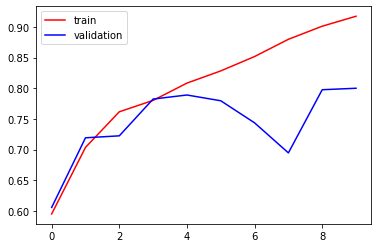

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

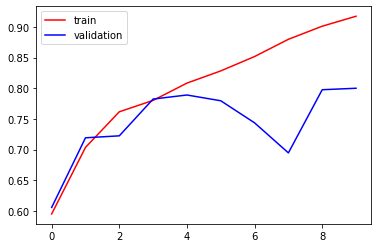

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

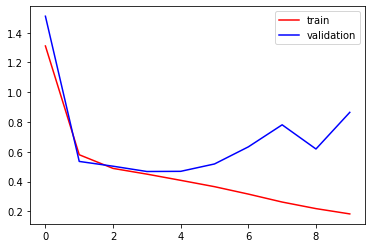

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [24]:
test_img = cv2.imread('/content/cat.jpg')

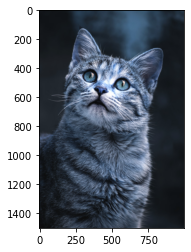

In [25]:
plt.imshow(test_img)

In [26]:
test_img.shape

(1500, 1000, 3)

In [27]:
test_img = cv2.resize(test_img,(256,256))

In [28]:
test_input= test_img.reshape((1,256,256,3))

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 250ms/step


array([[0.]], dtype=float32)

In [30]:
test_img1 = cv2.imread('/content/dog.jpg')

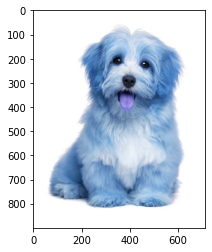

In [31]:
plt.imshow(test_img1)

In [32]:
test_img1.shape

(900, 711, 3)

In [33]:
test_img1 = cv2.resize(test_img1,(256,256))

In [34]:
test_input1= test_img1.reshape((1,256,256,3))

In [35]:
model.predict(test_input1)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)